In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Data files 
movie_data_path = "Outputs/movies.csv"

# Reading movie data into pandas 
movie_data = pd.read_csv(movie_data_path)

# Displaying data for preview 
movie_data.head(20)

,Movie_Id,Original_Title,Title,Language_Id,Overview,Release_Date,Popularity,Vote_Average,Vote_Count
0,496243,기생충,Parasite,ko,"All unemployed, Ki-taek's family takes peculia...",2019-05-30,86.639,8.500,17702
1,569094,Spider-Man: Across the Spider-Verse,Spider-Man: Across the Spider-Verse,en,"After reuniting with Gwen Stacy, Brooklyn’s fu...",2023-05-31,176.846,8.365,6427
2,637920,7. Koğuştaki Mucize,Miracle in Cell No. 7,tr,"Separated from his daughter, a father with an ...",2019-10-10,34.256,8.300,4327
3,527641,Five Feet Apart,Five Feet Apart,en,Seventeen-year-old Stella spends most of her t...,2019-03-14,41.779,8.268,5475
4,447362,Life in a Year,Life in a Year,en,A 17 year old finds out that his girlfriend is...,2020-11-27,53.193,8.261,1793
5,299534,Avengers: Endgame,Avengers: Endgame,en,After the devastating events of Avengers: Infi...,2019-04-24,127.987,8.254,25044
6,508965,Klaus,Klaus,en,When Jesper distinguishes himself as the Posta...,2019-11-08,25.094,8.247,3895
7,618344,Justice League Dark: Apokolips War,Justice League Dark: Apokolips War,en,Earth is decimated after intergalactic tyrant ...,2020-05-05,32.611,8.234,1426
8,315162,Puss in Boots: The Last Wish,Puss in Boots: The Last Wish,en,Puss in Boots discovers that his passion for a...,2022-12-07,172.852,8.234,7375
9,635302,劇場版「鬼滅の刃」無限列車編,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,ja,"Tanjiro Kamado, joined with Inosuke Hashibira,...",2020-10-16,192.505,8.229,3756


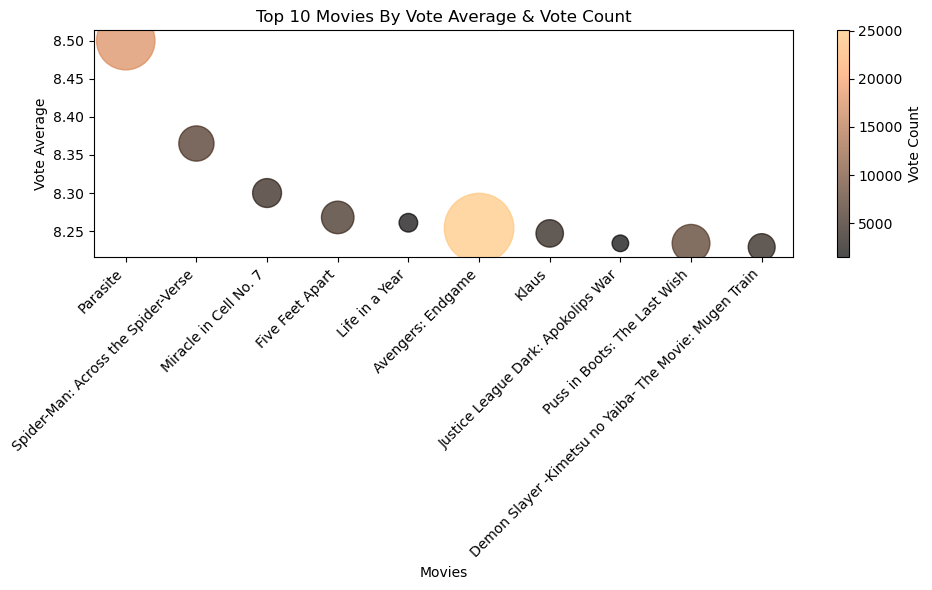

In [6]:
# Extract top ten movies 
top_ten_movies = movie_data.head(10)


# Extracting movie titles, vote count, and vote avg for plotting  
movie_titles = top_ten_movies['Title']
top_ten_by_avg = top_ten_movies['Vote_Average']
top_ten_by_count = top_ten_movies['Vote_Count']

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_ten_movies['Title'], top_ten_movies['Vote_Average'], s=top_ten_movies['Vote_Count']/10, c=top_ten_movies['Vote_Count'], cmap='copper', alpha=0.7)
plt.colorbar(label='Vote Count')
plt.xlabel('Movies')
plt.ylabel('Vote Average')
plt.title('Top 10 Movies By Vote Average & Vote Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Saving as PNG file
plt.savefig('Outputs/Top-10-avg-count-scatterplot.png')

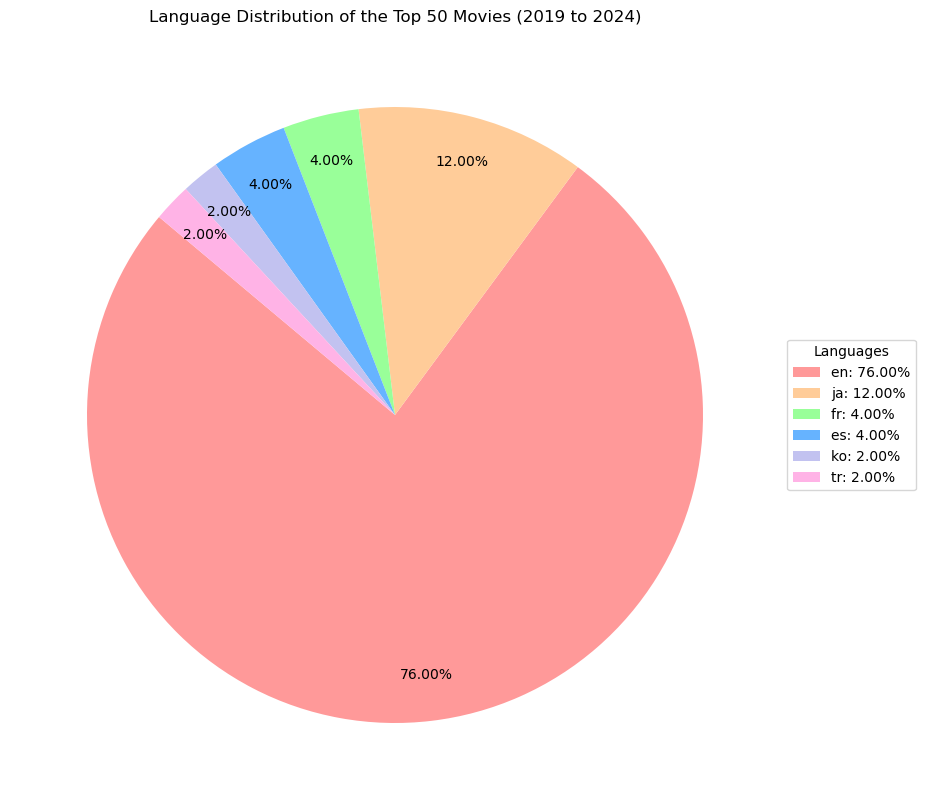

<Figure size 640x480 with 0 Axes>

In [7]:
# Extracting top 50 movies
top_ten_movies = movie_data.head(50)

# Plotting Pie Chart for the language distribution between movies
language_distribution = top_ten_movies['Language_Id'].value_counts()

# Define colors to ensure there are enough for all segments
colors = ['#ff9999', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb3b3', '#ccccff', '#ffcc80']

plt.figure(figsize=(15, 10))  # Increase figure size for better readability

# Plot pie chart with matplotlib directly
wedges, texts, autotexts = plt.pie(
    language_distribution,
    autopct='%1.2f%%',
    startangle=140,
    colors=colors,
    pctdistance=0.85
)

# Create a legend with the language labels and their respective percentages
labels = [f'{lang}: {pct:.2f}%' for lang, pct in zip(language_distribution.index, language_distribution.values * 100 / language_distribution.values.sum())]
plt.legend(wedges, labels, title="Languages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Language Distribution of the Top 50 Movies (2019 to 2024)')
plt.show()

# Saving as PNG file
plt.savefig('Outputs/Language-distribution-top-50.png')

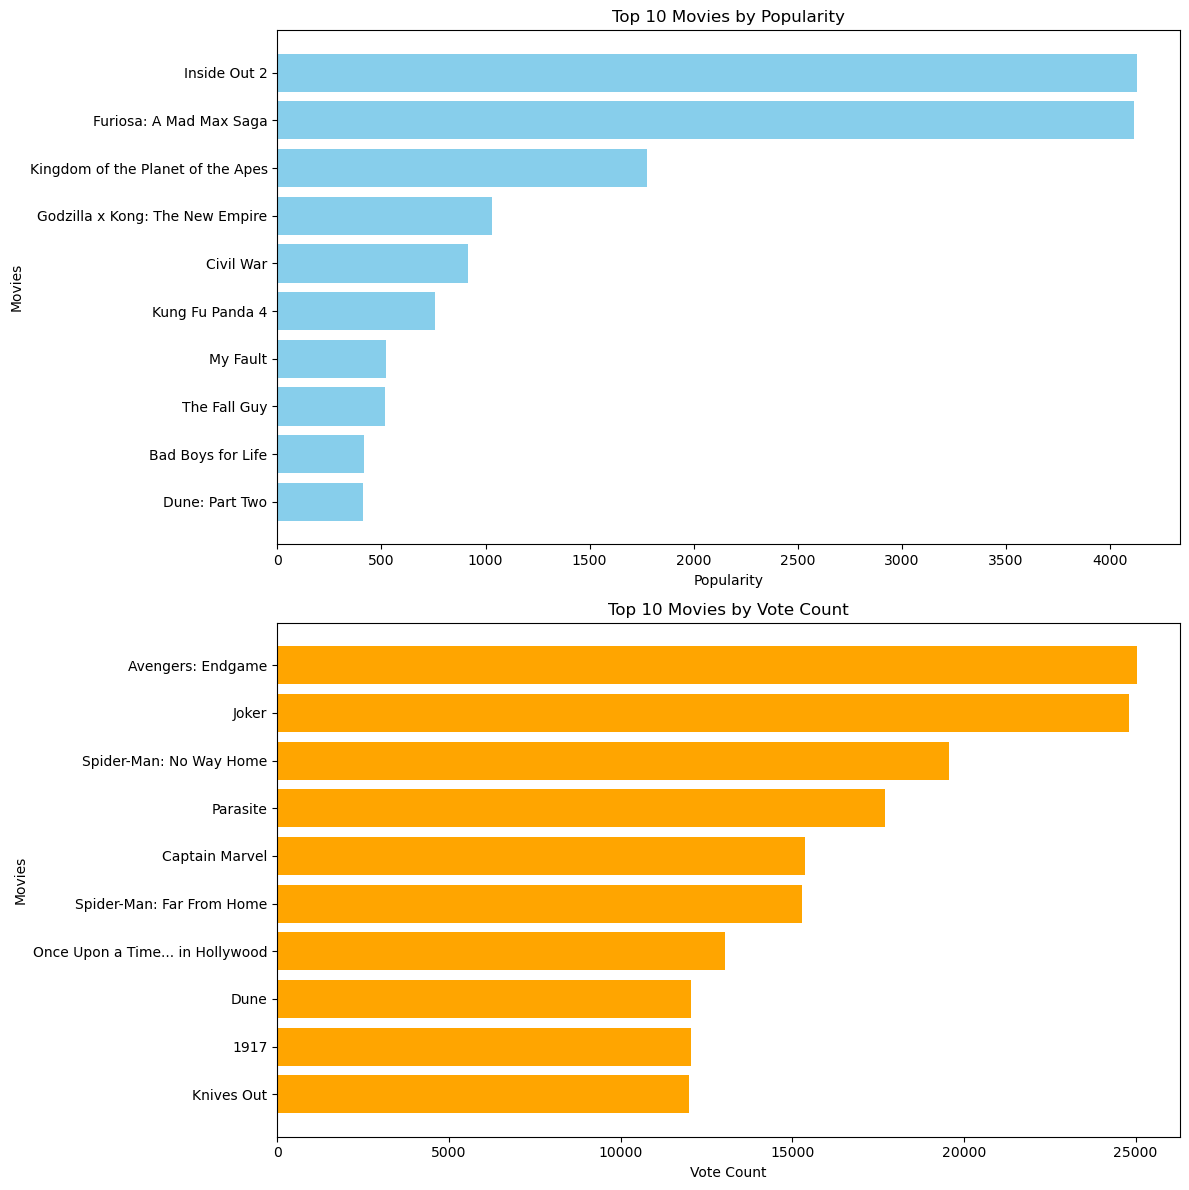

<Figure size 640x480 with 0 Axes>

In [8]:
chart_df = pd.DataFrame(movie_data)

# Sort by popularity and vote count to get the top 10
top10_popularity = chart_df.nlargest(10, 'Popularity')
top10_vote_count = chart_df.nlargest(10, 'Vote_Count')

# Sort by popularity and vote count to get the top 10
top10_popularity = chart_df.nlargest(10, 'Popularity')
top10_vote_count = chart_df.nlargest(10, 'Vote_Count')

# Plotting bar charts
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Bar chart for top 10 by popularity
ax[0].barh(top10_popularity['Title'], top10_popularity['Popularity'], color='skyblue')
ax[0].set_xlabel('Popularity')
ax[0].set_ylabel('Movies')
ax[0].set_title('Top 10 Movies by Popularity')
ax[0].invert_yaxis()  # Invert y-axis to have the highest popularity at the top

# Bar chart for top 10 by vote count
ax[1].barh(top10_vote_count['Title'], top10_vote_count['Vote_Count'], color='orange')
ax[1].set_xlabel('Vote Count')
ax[1].set_ylabel('Movies')
ax[1].set_title('Top 10 Movies by Vote Count')
ax[1].invert_yaxis()  # Invert y-axis to have the highest vote count at the top

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

# Saving as PNG file
plt.savefig('Outputs/Top-10-avg-popularity-vote-count.png')